In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Set up the filter parameters and components

trueRange = 5;            # m

FF = np.array([1]);       # [1]
measNoiseVar  = 0.1;      # m^2
plantNoiseVar = 0.2;      # m^2

nT = 100;

rr = np.zeros(nT)     # range estimate
PP = np.zeros(nT)     # range variance

In [69]:
# Initialize the filter

rr[0] = 10;               # really bad initial guess
PP[0] = 10**2;            # no certainty in guess

for jj in range(1,nT):
    
    rPred = rr[jj-1]                  # kinematic model says we didn't move, so don't move
    PPred = PP[jj-1] + plantNoiseVar  # no need to smear uncertainty with motion, only need plant noise
    
    meas = trueRange + measNoiseVar*np.random.randn()      # we measure the range, corrupted by noise
    
    KK = PPred/(PPred + measNoiseVar)    # Kalman gain
    
    rr[jj] = rPred + KK*(meas - rPred)   # Balance model with measurement
    
    LL = (1 - KK)  # the notation thing
    
    PP[jj] = LL*PPred # update uncertainty

Text(0, 0.5, 'Standard deviation (m)')

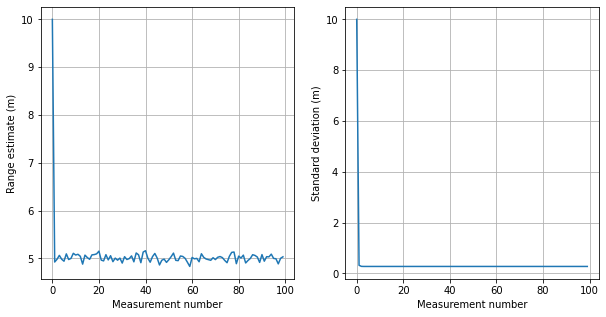

In [70]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(range(nT), rr)
plt.grid('on')
plt.xlabel('Measurement number')
plt.ylabel('Range estimate (m)')

plt.subplot(122)
plt.plot(range(nT), np.sqrt(PP))
plt.grid('on')
plt.xlabel('Measurement number')
plt.ylabel('Standard deviation (m)')

We see with very accurate measurements we quickly converge to the 5m range and have an asymptotic standard deviation.  If one plays with the measurement quality parameter of measNoiseVar, we see the standard deviation still collapses quickly despite mess in the position. This can be remedied by balancing the plant noise covariance with the measurement noise.

The plant noise covariance is a non-physical parameter in the system that requires tuning to bring the proper results from the filter.  Note that since the model was stationary, we did not need time nor measurement frequency integrated.  This is unusual for a filtering problem, but we infer from here, for a fully static case, how long it would take measurements of a particular quality (variance and frequency) to bring a desired certainty to the system, if such a certainty were attainable.  We see above, as set up, a standard deviation of no more than ~0.062m.  This, however, requires measurement sdev of np.sqrt(0.1) \approx 0.32m, which is highly accurate.

Conclusion on a toy problem: models bring more confidence, BUT:

    Also rely on measurement quality
    
    Need plant noise tuning 
    
    Needs (a) kinematic model(s) in the first place